In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

In [13]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [172]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2949 - accuracy: 0.9147
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1420 - accuracy: 0.9579s - loss: 0.1492 - accuracy: 0.95 - - ETA: 0s - loss: 0.1432 
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1056 - accuracy: 0.9674
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0866 - accuracy: 0.9737
Epoch 5/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0731 - accuracy: 0.9770


In [16]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.0366 - accuracy: 0.9769


[0.06993509250525386, 0.9769]

In [18]:
# *** #
# Basic Classification Tutorial
# https://www.tensorflow.org/tutorials/keras/classification
# *** #

In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [21]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [23]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
len(train_labels)

60000

In [27]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
len(test_labels)

10000

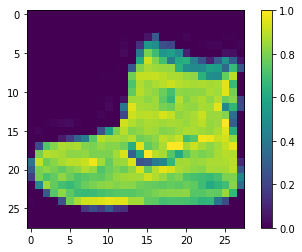

In [39]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0

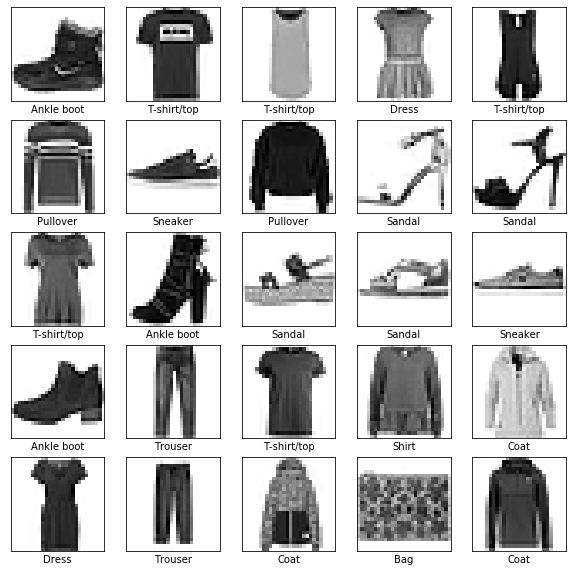

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [61]:
print(tf.shape(train_images))
print(tf.shape(train_labels))

tf.Tensor([60000    28    28], shape=(3,), dtype=int32)
tf.Tensor([60000], shape=(1,), dtype=int32)


In [71]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='elu'),
    keras.layers.Dense(10, activation='softmax')
])

In [72]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [73]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4878 - accuracy: 0.8261
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3747 - accuracy: 0.8637s - loss: 0.3748 - accuracy: 0.86
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3378 - accuracy: 0.8758
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3132 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2942 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2790 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2663 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2546 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2414 

In [75]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2332 - accuracy: 0.8865

Test accuracy: 0.8865


In [76]:
predictions = model.predict(test_images)

In [77]:
predictions[0]

array([7.1370279e-09, 3.9932697e-08, 1.7777958e-07, 7.9440191e-08,
       7.1121195e-07, 6.0186535e-04, 4.8308429e-08, 8.1840381e-03,
       4.5779545e-09, 9.9121302e-01], dtype=float32)

In [78]:
np.argmax(predictions[0])

9

In [79]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [80]:
test_labels[0]

9

In [85]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                          class_names[true_label]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

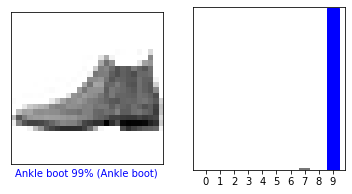

In [91]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

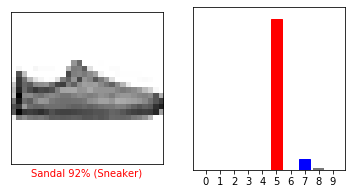

In [92]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

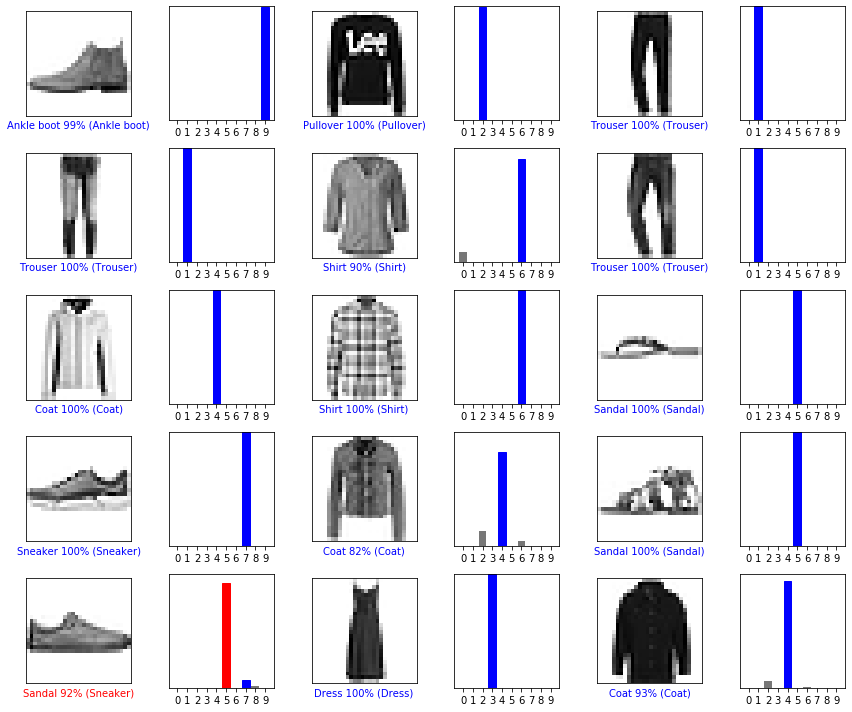

In [139]:
# Plot the first X test images, their predicted lables, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [144]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [145]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [162]:
img2 = test_images[2]
img3 = test_images[3]
arr = np.array([img2, img3])

print(arr.shape)

(2, 28, 28)


In [164]:
predictions_arr = model.predict(arr)

print(predictions_arr)

[[3.0317537e-07 9.9999964e-01 1.4218950e-09 2.4575513e-08 4.5187104e-10
  9.1585231e-19 8.7125307e-11 4.2668997e-11 6.1092858e-12 6.7912967e-14]
 [5.2310925e-06 9.9995625e-01 7.6388960e-07 3.7559341e-05 1.8803944e-07
  4.7878832e-14 5.8613224e-08 2.7596903e-10 1.5532563e-11 1.3660683e-09]]


[[3.0317537e-07 9.9999964e-01 1.4218950e-09 2.4575513e-08 4.5187104e-10
  9.1585231e-19 8.7125307e-11 4.2668997e-11 6.1092858e-12 6.7912967e-14]
 [5.2310925e-06 9.9995625e-01 7.6388960e-07 3.7559341e-05 1.8803944e-07
  4.7878832e-14 5.8613224e-08 2.7596903e-10 1.5532563e-11 1.3660683e-09]]


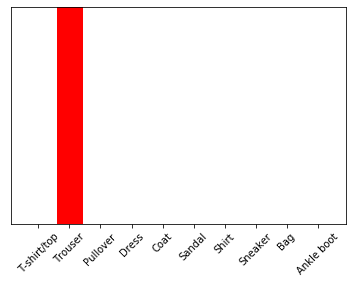

In [170]:
print(predictions_arr)
# for pred in predictions_arr[0]:
#     plot_value_array(1, predictions_arr[0], test_labels)
# _ = plt.xticks(range(10), class_names, rotation=45)

In [146]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3257147e-04 2.5340363e-11 9.9795926e-01 2.7381157e-09 7.8812335e-04
  8.9336211e-10 1.1200091e-03 1.2536983e-10 1.6458819e-10 2.2496857e-12]]


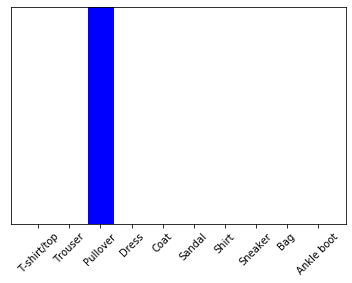

In [147]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [148]:
np.argmax(predictions_single[0])

2

In [1]:
#################

In [21]:
list = [[[1, 2], [2, 2], [0, 3]], [True, False, True]]
(a, b) = list

In [22]:
a

[[1, 2], [2, 2], [0, 3]]

In [23]:
b

[True, False, True]